### <font color='white'> Simulation Processes Course. <font>



<font color = 'gray'> 

**Team:**<br>

&nbsp; 1. [MascoSC08](https://github.com/MarcoSC08)<br>
&nbsp; 2. [EstebanMqz](https://github.com/EstebanMqz)<br>

**Date:** October 07, 2021.

**Repository**: https://github.com/EstebanMqz/Inverse-Transform
<font>
<br><br>
<font color= 'orange'> Inverse Transform<font>

#### Instructions:
Generate random samples that distribute according to functions using the inverse transform method. <br>
Plot their histogram for 1000 samples with the inverse transform method and compare them.<br>
$f(x)$ is the [pdf](https://en.wikipedia.org/wiki/Probability_density_function)<br>
$F(x)$ is the [cdf](https://en.wikipedia.org/wiki/Cumulative_distribution_function).

### Exercise 1:
The time in which a Brownian motion remains above its maximum point in the interval [0,1] has a distribution: $F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$

#### <span style='color:lightbrown'> 1. MarcoSC08 </span><br>

**Inverse transformation**

If it solves: $u=\frac{2}{\pi}\sin^{-1}(\sqrt x)$

$arcsin(\sqrt x)=\frac{u\pi}{2}$

$arcsin(a)=b$ -> $a=sin(b)$ $\sqrt x=\sin(\frac{u\pi}{2})$

*Solve for $x$:*
$x=\sin^{2}(\frac{\pi}{2}U)$


In [1]:
#libraries
from math import factorial as fac
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
N=100
def funcion(N):
    y = (np.sin((np.random.random(N)*np.pi)/2))**2
    return y

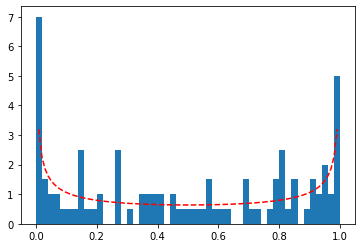

In [3]:
x = np.arange(0,60,0.01)
y2 = 1/(np.pi*(np.sqrt(1-x)*np.sqrt(x)))

plt.plot(x,y2,'r--')

N = 100
r1 = funcion(N)
plt.hist(r1,bins=50,density=True)
plt.show()

##### <span style='color:lightblue'> 1. EstebanMqz </span><br>

With the inverse transform method through the equivalence of the cdf to $x~U$ if we solve for x:<br>
$U=\frac{2}{\pi}\sin^{-1}(\sqrt x)$<br><br>
$\sin^{-1}(\sqrt x)=\frac{\pi}{2}U$<br><br>
$\sqrt x=\sin(\frac{\pi}{2}U)$<br><br>
$\sqrt x=\sin(\frac{\pi}{2}U)$<br><br>
$x=\sin^{2}(\frac{\pi}{2}U)$

In $[0,1]$
<br><br>
The probability density function is the derivative of $F(X)$ so it is obtained:

$f(x) = \frac{d(\frac{2}{\pi}\sin^{-1}(\sqrt x))}{dx}$<br><br>
$f(x) = \frac{2}{2\pi\sqrt x \sqrt{ (1-(\sqrt x )^2)}}$<br><br>
$f(x) = \frac{1}{\pi\sqrt {x(1-x)}}$

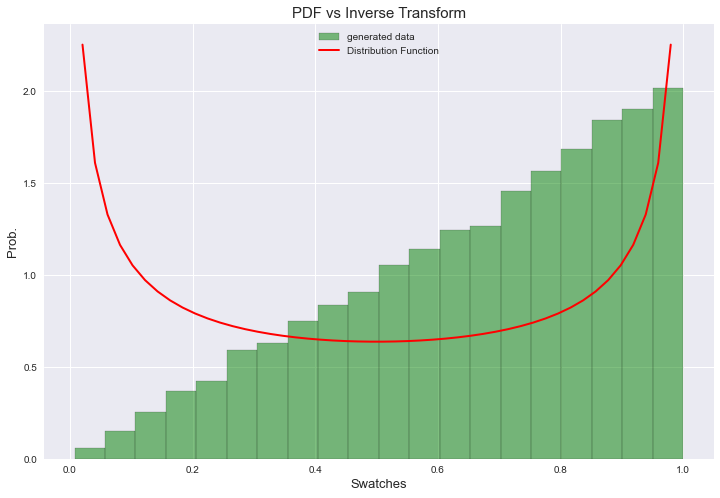

In [4]:
#Define x
def Brownian(n: 'Number of samples'):
    if n < 0:
        raise ValueError('n must be non-negative')
    if n > 1:
        return (np.sin((np.pi/2)*np.random.rand(n)))**2 #f(x) 
    else:
        return 0


import numpy as np
import matplotlib.pyplot as plt

#Inverse function
def inverse_function(f):
    """ Inverse function of f
    Parameters
    ----------
    f : array_like
        Array of random numbers
    Returns
    -------
    g : array_like
        Inverse function of f
    """
    return np.sqrt(f)

#Generate random data
def random_data(n):
    """Generate n random numbers between 0 and 1
    Parameters
    ----------
    n : int
        Number of random numbers
    Returns
    -------
    f : array_like
        Array of random numbers
    """
    
    return np.random.random(n)

#Plot comparison between random data with the inverse function and the pdf
def plot_comparison(f, g):
    plt.style.use('seaborn')
    plt.figure(figsize = (12, 8)) #Size
    #Function, #bars, label, #Normalized
    plt.hist(f, bins = 20, label = 'generated data', density = True, color='green', alpha=0.5, edgecolor='black')
    x = np.linspace(0,1) #Start,stop
    y = lambda x: 1/(np.pi*(np.sqrt(x*(1-x)))) 
    plt.plot(x,y(x),'k',lw = 2, label = 'Distribution Function', color='red') #plot
    plt.title("PDF vs Inverse Transform", fontsize= 15) #title
    #Esthetic
    plt.ylabel('Prob.', fontsize= 13)
    plt.xlabel('Swatches', fontsize= 13)
    plt.legend()
    plt.show() #Show

if __name__ == '__main__':
    f = random_data(10000)
    g = inverse_function(f)
    plot_comparison(g, f)

n=1000
f = Brownian(n)

#### 2. Discrete Random Variable Generation<br>
$x$~$B(n,p)$ models successes out of n independent trials where there is a probability $p$ of success on each trial.
Generate a binomial random variable with parameters $n=10$ and $p=0.7$.<br>
Remember that: $X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i} ,\quad i=0,1,\cdots,n$
By properties of the factorial operation the previous $p_i$ can be written as:<br>
$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $

#### <span style='color:lightbrown'> 2. MarcoSC08 </span><br>

In [5]:
# student solution code 1
def Gen_discrete_distr(U:'vector of random numbers',
                       p_acum: 'Cumulative P. of the distribution to generate'):
    '''Note that this array counts numbers starting from 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribution:'distribution to plot histogram',
                            label:'label of the legend'):
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribution,bins = len(set(distribution))) #count the number of distinct elements of the variable 'distribution'
    plt.bar(list(set(distribution)),y,label=label)
    plt.legend()
    plt.show()

# Function that calculates the cumulative probability
def P_accum_Binomial(n,p):
    c = p/(1-p)
    pr = [(1-p)**n]
    add = pr.append
    for i in range(n+1):
        add((c*(n-i)/(i+1))*pr[-1])
    return np.cumsum(pr)

# Function that calculates the optimized cumulative probability
def P_accum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
            
    [pr(i) for i in range(n-1)] # Fill the vector Pr using list compression
    return np.cumsum(Pr)

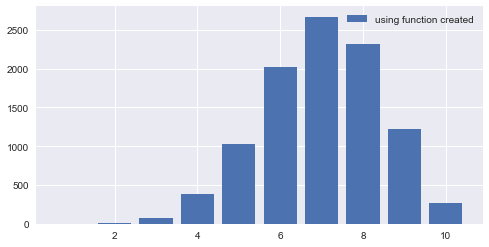

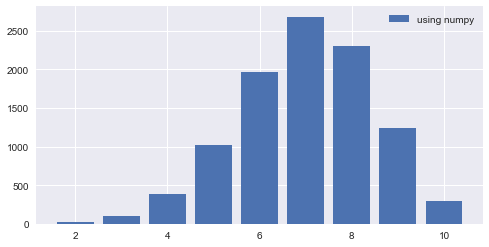

In [6]:
# def D_binomial_intermediate(n,p,N):
n=10; p = 0.7; N = 10**4

p_acum = P_accum_Binomial_o(n,p)
u = np.random.rand(N)

# Using the inverse transform method
d_binomial = Gen_discrete_distr(u,p_acum)
plot_histogram_discrete(d_binomial,'using function created')

# using numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'using numpy')

##### <span style='color:lightblue'> 2. EstebanMqz </span><br>

We implement the inverse transform method to generate 10000 samples from a discrete random variable <br>
and compare the results over $X$~$B(10,0.7)$ with an histogram.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


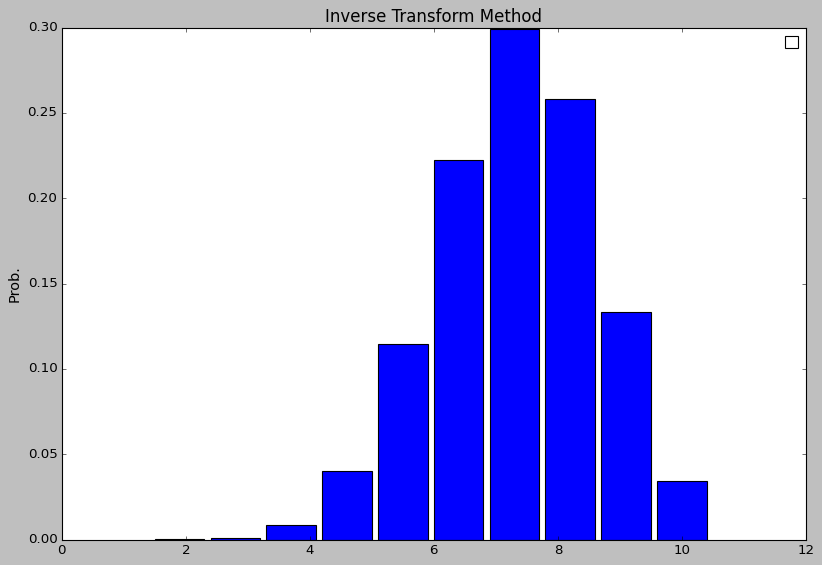

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


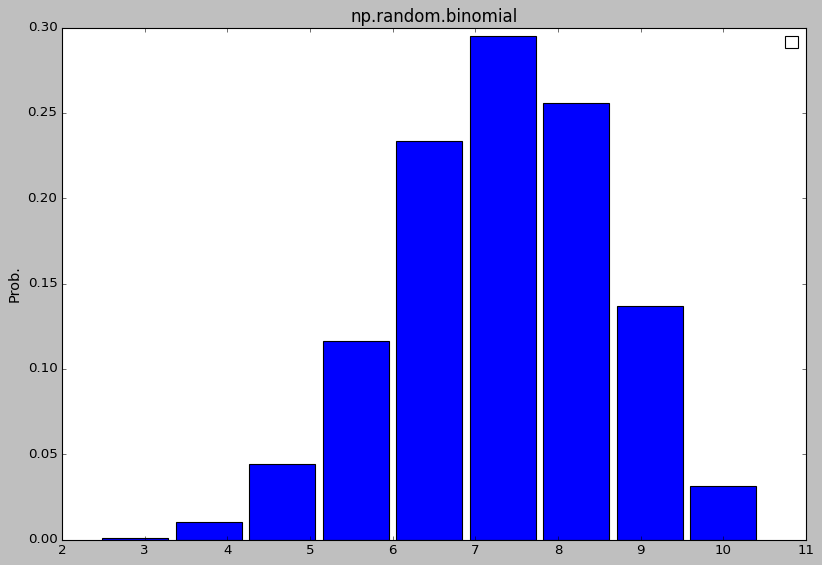

In [7]:
# student solution code 2
def inverse(n: 'n. binom.',p:'p. binom.',N:'Simulations'):
    '''
    Binomial function generated from a uniform distribution by using
    the formula: ((p/(1-p))*(n-i)/(i+1))*pi. .
    '''
    def accum():
        pi = np.zeros(n) #Creation of vector for its filling
        pi[0] = (1-p)**n #First position
        def p_n(i): #Filling of remaining positions
            nonlocal pi #Work with non-local variable
            pi[i+1]=((p/(1-p))*(n-i)/(i+1))*pi[i] #Iterations of filling from formula.
        [p_n(i) for i in range(n-1)] #List compression
        return pi.cumsum() #Cumulative sum
    p_cum = accum() #Call of function accum.
    u = np.random.rand(N) #Random values
    inv = np.array(list(map(lambda z:sum(1 for i in p_cum if i<u[z]),range(N))))
    return inv

def discrete_histogram(dist:'Graph'):
    '''
    Function to plot the histogram of the generated discrete function. It receives two variables: dist, which is the distribution
    generated discretely, and name, which is the label of the graph.
    '''
    y,x = np.histogram(dist,bins = len(set(dist)),density = True)
    plt.style.use('classic')
    plt.bar(x[1:],y)
    plt.legend()
    plt.show()
    
n = 10
p = 0.7
N = 10000

plt.style.use('classic')
plt.figure(figsize = (12, 8)) #Size
inv = inverse(n,p,N)
plt.ylabel('Prob.', fontsize= 13)
plt.title('Inverse Transform Method', fontsize= 15)
discrete_histogram(inv)

plt.figure(figsize = (12, 8)) #Size
plt.ylabel('Prob.', fontsize= 13)
plt.title('np.random.binomial', fontsize= 15)
discrete_histogram(np.random.binomial(n,p,N))
